In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths

storage = paths.storage.Storage("toy_retis.nc", "r")

In [2]:
len(storage.samplesets)

893

In [3]:
retis = storage.transitions.load(0)
sset0 = storage.samplesets[0]

In [4]:
%%time
storage.samples.cache_all()

CPU times: user 418 ms, sys: 54.6 ms, total: 473 ms
Wall time: 4.1 s


In [5]:
%%time
trace_1 = paths.trace_ensembles_for_replica(0, storage)

CPU times: user 16.4 s, sys: 156 ms, total: 16.6 s
Wall time: 17.5 s


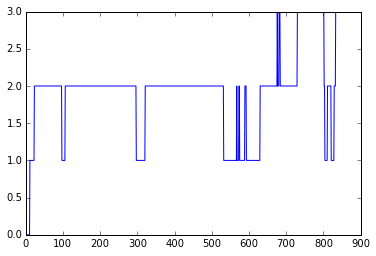

In [6]:
plt.plot([sset0[e].replica for e in trace_1])

In [7]:
repx_net = paths.ReplicaNetwork(storage=storage)

In [8]:
repx_net.flow(bottom=retis.minus_ensemble, top=retis.ensembles[-1])

{<openpathsampling.ensemble.MinusInterfaceEnsemble at 0x111b406d0>: 1.0,
 <openpathsampling.ensemble.TISEnsemble at 0x111b037d0>: 0.9411764705882353,
 <openpathsampling.ensemble.TISEnsemble at 0x111b03d90>: 0.0,
 <openpathsampling.ensemble.TISEnsemble at 0x111b0b890>: 0.0,
 <openpathsampling.ensemble.TISEnsemble at 0x111b15290>: 0.0,
 <openpathsampling.ensemble.TISEnsemble at 0x111b15710>: 0.987546699875467,
 <openpathsampling.ensemble.TISEnsemble at 0x111b40690>: 0.9511111111111111}

In [9]:
repx_net.trips(bottom=retis.minus_ensemble, top=retis.ensembles[-1])

{'down': [], 'round': [], 'up': []}

In [10]:
repx_net.transition_matrix()

,-1,0,1,2,3,4,5
-1,0,0.00,0.000000,0.000000,0.000000,0.000,0
0,1,0.00,0.000000,0.000000,0.000000,0.000,0
1,0,0.25,0.000000,0.000000,0.000000,0.000,0
2,0,0.00,0.589744,0.000000,0.000000,0.000,0
3,0,0.00,0.000000,0.176471,0.000000,0.000,0
4,0,0.00,0.000000,0.000000,0.128205,0.000,0
5,0,0.00,0.000000,0.000000,0.000000,0.375,0


In [11]:
repx_net.mixing_matrix()

,-1,0,1,2,3,4,5
-1,0.0,0.500,0.000000,0.000000,0.000000,0.000000,0.0000
0,0.5,0.000,0.125000,0.000000,0.000000,0.000000,0.0000
1,0.0,0.125,0.000000,0.294872,0.000000,0.000000,0.0000
2,0.0,0.000,0.294872,0.000000,0.088235,0.000000,0.0000
3,0.0,0.000,0.000000,0.088235,0.000000,0.064103,0.0000
4,0.0,0.000,0.000000,0.000000,0.064103,0.000000,0.1875
5,0.0,0.000,0.000000,0.000000,0.000000,0.187500,0.0000


In [12]:
import networkx as nx
repx_graph = nx.Graph()

In [13]:
rrow = repx_net.acceptance_matrix.row
rcol = repx_net.acceptance_matrix.col
rval = repx_net.acceptance_matrix.data
for (row, col, val) in zip(rrow, rcol, rval):
    repx_graph.add_edge(row, col, weight=val)

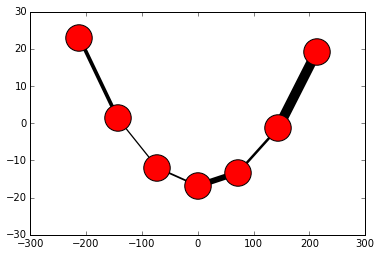

In [32]:
#import pygraphviz
pos=nx.graphviz_layout(repx_graph)
weights = [10*repx_graph[u][v]['weight'] for u,v in repx_graph.edges()]
nx.draw_networkx_nodes(repx_graph, pos, node_size=700)
nx.draw_networkx_edges(repx_graph, pos, width=weights)

In [30]:
repx_graph.degree(3)

2